In [52]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np

In [53]:
X_train = np.loadtxt('C:/Users/Dell_USA/Downloads/Compressed/drive-download-20240428T100531Z-001/input.csv', delimiter = ',')
Y_train = np.loadtxt('C:/Users/Dell_USA/Downloads/Compressed/drive-download-20240428T100531Z-001/labels.csv', delimiter = ',')

X_test = np.loadtxt('C:/Users/Dell_USA/Downloads/Compressed/drive-download-20240428T100531Z-001/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('C:/Users/Dell_USA/Downloads/Compressed/drive-download-20240428T100531Z-001/labels_test.csv', delimiter = ',')

In [54]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [55]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [51]:
print(X_train)

[[[[0.14509804 0.15294118 0.09803922]
   [0.10196078 0.09411765 0.03529412]
   [0.13333333 0.09803922 0.03921569]
   ...
   [0.22352941 0.17254902 0.1372549 ]
   [0.23921569 0.18431373 0.14901961]
   [0.25490196 0.2        0.16470588]]

  [[0.17647059 0.16862745 0.10980392]
   [0.10980392 0.09803922 0.03137255]
   [0.20392157 0.15686275 0.09411765]
   ...
   [0.21176471 0.16078431 0.1254902 ]
   [0.22352941 0.16862745 0.13333333]
   [0.23921569 0.18431373 0.14901961]]

  [[0.20392157 0.17647059 0.10196078]
   [0.1254902  0.09411765 0.01960784]
   [0.27058824 0.21176471 0.1372549 ]
   ...
   [0.21176471 0.15686275 0.11372549]
   [0.21960784 0.16470588 0.12156863]
   [0.23137255 0.17647059 0.13333333]]

  ...

  [[0.07843137 0.15294118 0.        ]
   [0.39607843 0.49019608 0.2627451 ]
   [0.59607843 0.71372549 0.47058824]
   ...
   [0.18039216 0.16078431 0.0745098 ]
   [0.23529412 0.21568627 0.12941176]
   [0.23529412 0.21568627 0.12941176]]

  [[0.18039216 0.25490196 0.03529412]
   [0.4

In [25]:
X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
import matplotlib.pyplot as plt
import random

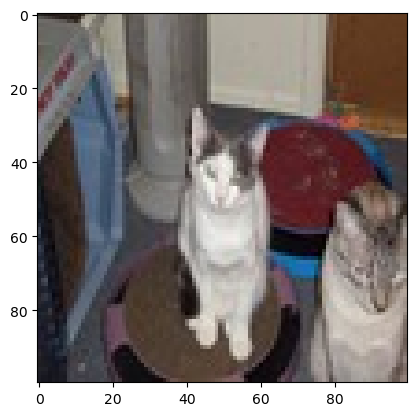

In [30]:
idx = random.randint(0 , len(X_train))
plt.imshow(X_train[idx, :])

In [56]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
           
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])

In [35]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)),)

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [36]:
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [38]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.7106 - loss: 0.5508
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.7611 - loss: 0.5104
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.7906 - loss: 0.4523
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.7962 - loss: 0.4222
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8136 - loss: 0.3853


In [39]:
model.evaluate(X_train, Y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7969 - loss: 0.4273


[0.3328905999660492, 0.8585000038146973]

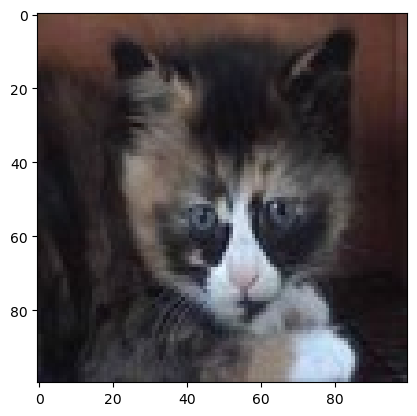

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.97710896]]
cat


In [50]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print(pred)